In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.246147,35.098938,26.652754,28.784334,855215656
2007-10-08,30.595381,33.335983,30.403057,33.335983,126671715
2007-10-09,32.678886,32.967370,28.960641,30.611413,116725709
2007-10-10,32.983383,33.656514,32.694900,33.528298,67931378
2007-10-11,36.669582,38.464597,32.694909,38.464597,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,78.914739,79.940663,77.901319,78.951438,1.188963e+07
std,63.347788,64.088165,62.559385,63.329496,2.061999e+07
min,18.827002,20.125415,16.879381,20.028034,0.000000e+00
25%,36.193228,36.764225,35.658699,36.230283,4.799653e+06
50%,54.994537,55.629541,54.258554,55.100130,8.344398e+06
75%,82.348719,83.331662,81.372242,82.371124,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.24614715576172,35.09893816090402,26.65275437401549,28.78433449972458,855215656
2,1,2007-10-08,30.595380783081055,33.33598294721486,30.403056985188236,33.33598294721486,126671715
3,2,2007-10-09,32.67888641357422,32.96737000053574,28.960641438351498,30.61141273645566,116725709
4,3,2007-10-10,32.98338317871094,33.65651415747269,32.69489971569215,33.52829759429556,67931378


In [13]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
# df = df.drop(['Date', 'Adj Close'], axis = 1)

In [16]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.246147,35.098938,26.652754,28.784334,855215656
1,2007-10-08,30.595381,33.335983,30.403057,33.335983,126671715
2,2007-10-09,32.678886,32.967370,28.960641,30.611413,116725709
3,2007-10-10,32.983383,33.656514,32.694900,33.528298,67931378
4,2007-10-11,36.669582,38.464597,32.694909,38.464597,106320954


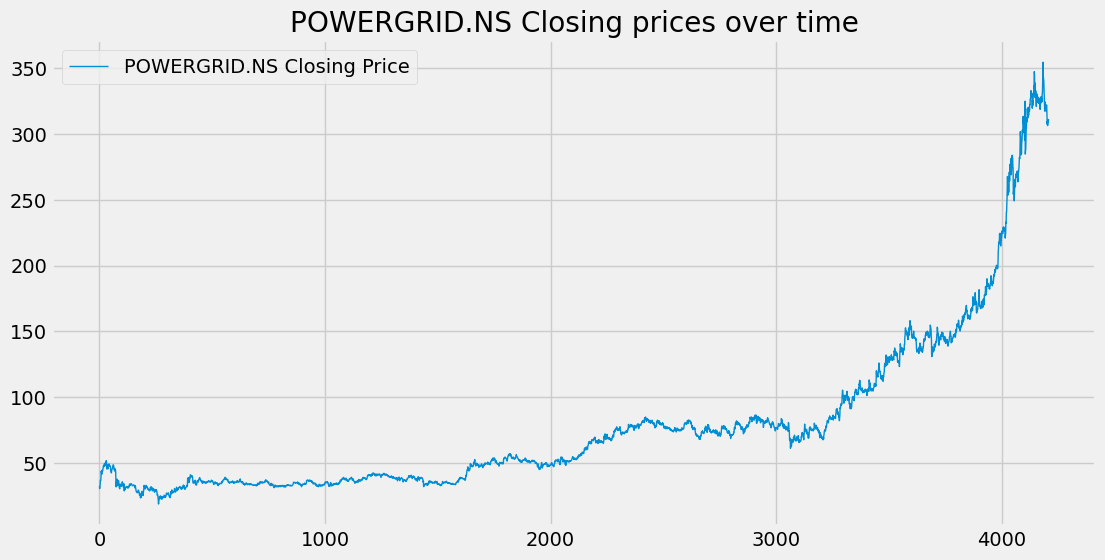

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

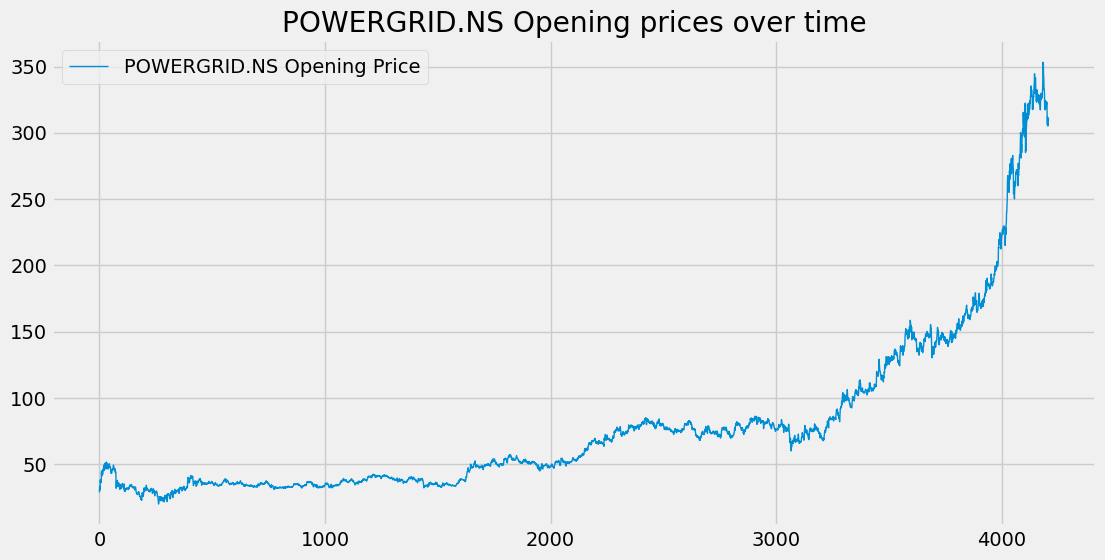

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

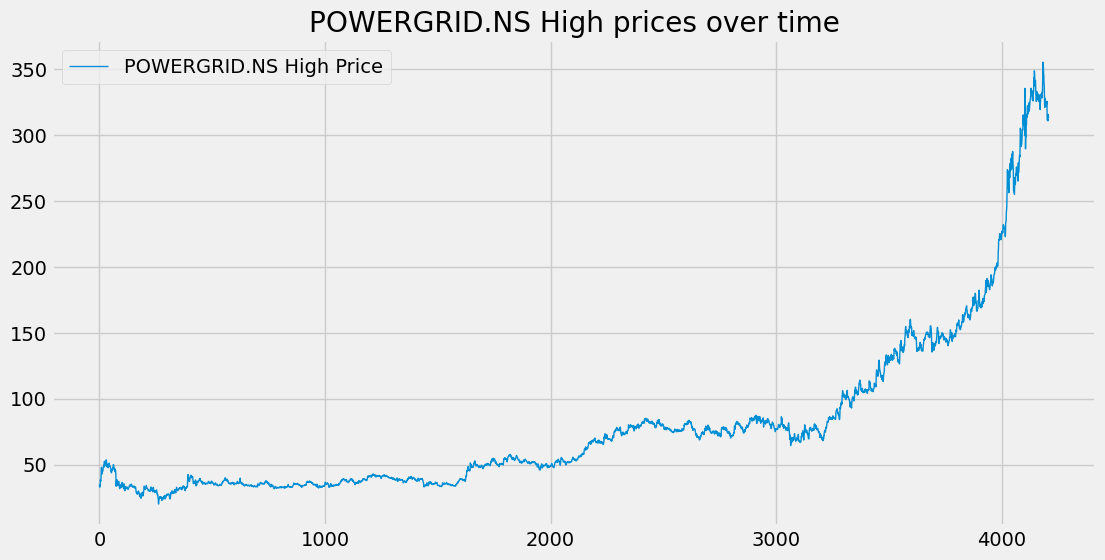

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

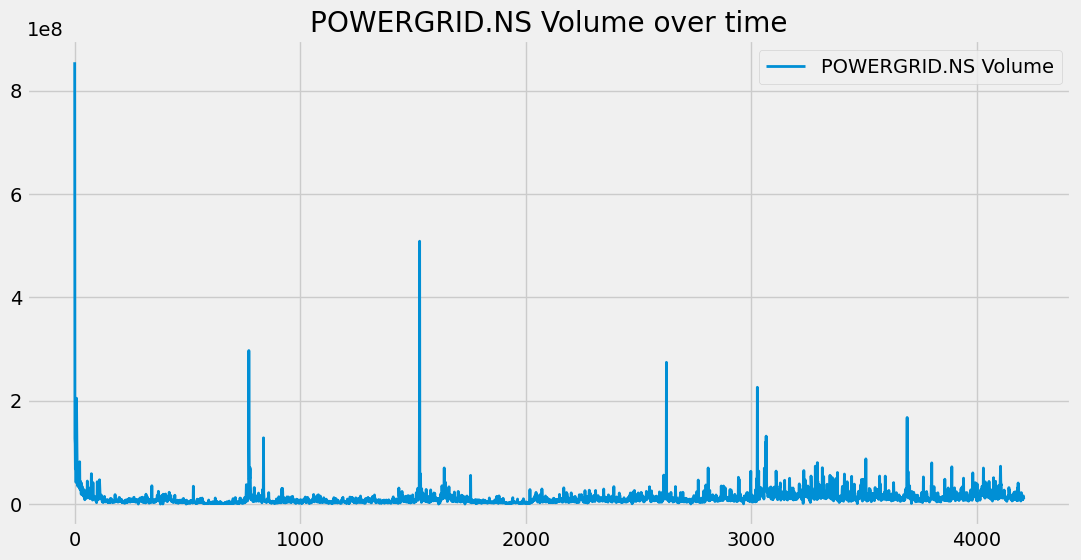

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [22]:
import pandas as pd


In [24]:
ma100 = df.Close.rolling(100).mean()

In [25]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,323.594427
4204,323.834957
4205,324.069895
4206,324.268579


In [26]:
ma200 = df.Close.rolling(200).mean()

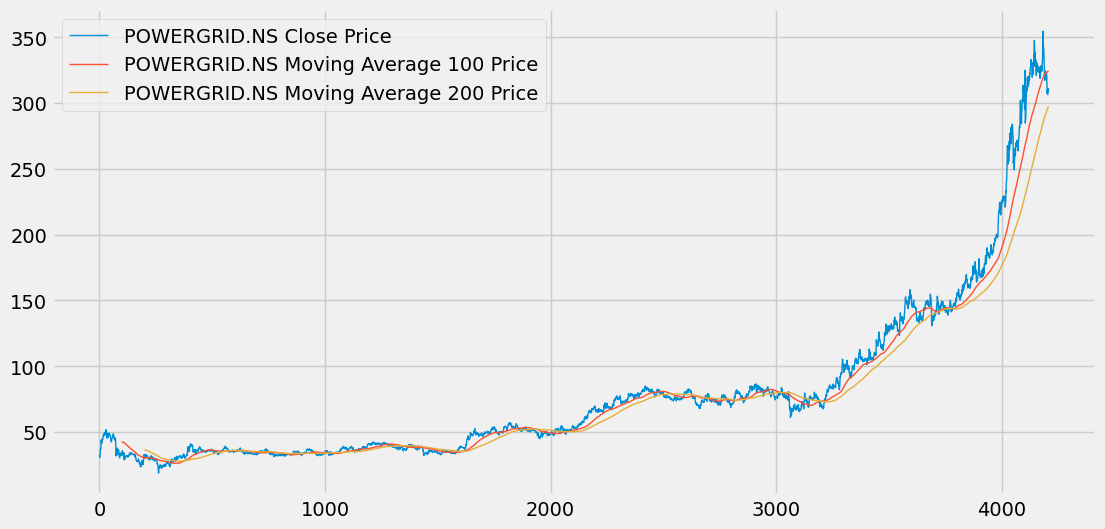

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [28]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [29]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

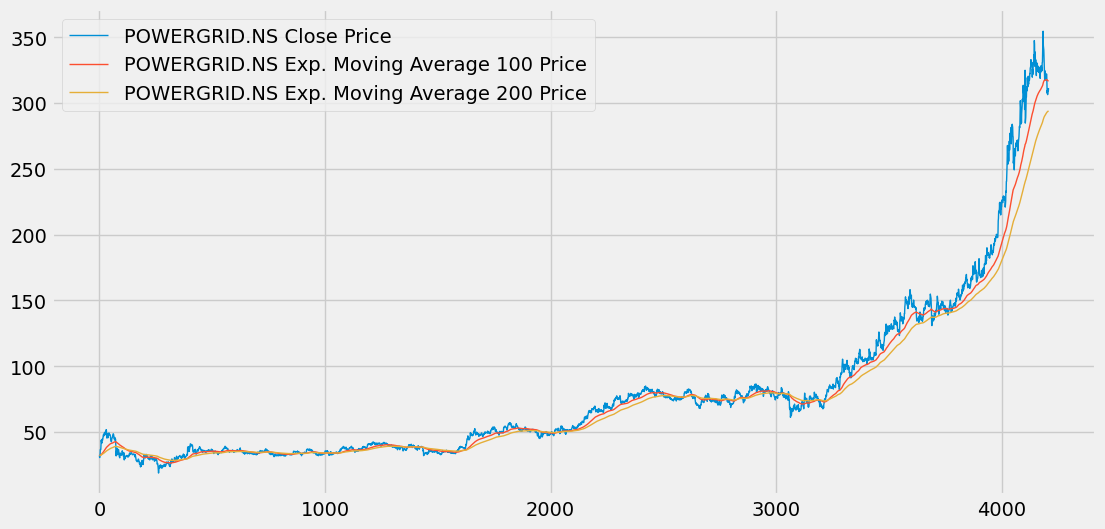

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [31]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [32]:
data_training.shape

(2945, 1)

In [33]:
data_testing.shape

(1263, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [35]:
data_training_array = scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[0.19808596],
       [0.17371827],
       [0.20447382],
       ...,
       [0.90774413],
       [0.86000358],
       [0.87299642]])

In [37]:
data_training_array.shape[0]

2945

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(2845, 100, 1)

In [40]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [42]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - loss: 0.0805
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - loss: 0.0087
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0063
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - loss: 0.0062
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - loss: 0.0058
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - loss: 0.0059
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - loss: 0.0053
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - loss: 0.0049
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - loss: 0.0047
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - loss: 0.0047
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 253ms/step - loss: 0.0043
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0038
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - loss: 0.0037
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - loss: 0.0035
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [48]:
past_100_days = data_training.tail(100)

In [50]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [51]:
final_df.head()

Ticker,POWERGRID.NS
0,75.405792
1,76.943039
2,77.206009
3,77.044197
4,77.489182


In [52]:
input_data = scaler.fit_transform(final_df)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [54]:
x_test.shape

(1263, 100, 1)

In [55]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step


In [56]:
y_predicted.shape

(1263, 1)

In [57]:
scaler.scale_

array([0.00340836])

In [58]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

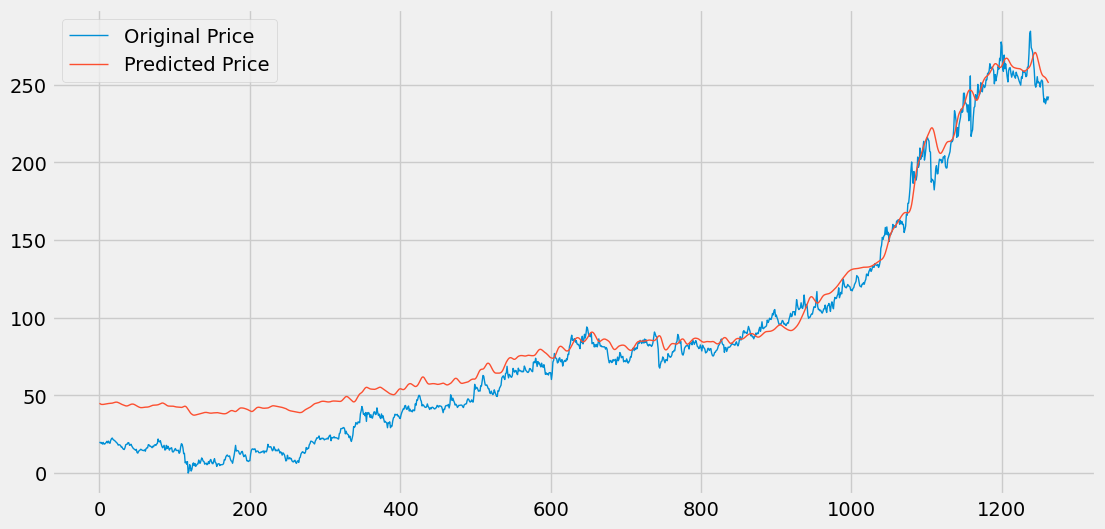

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [60]:
model.save('stock_dl_model.h5')